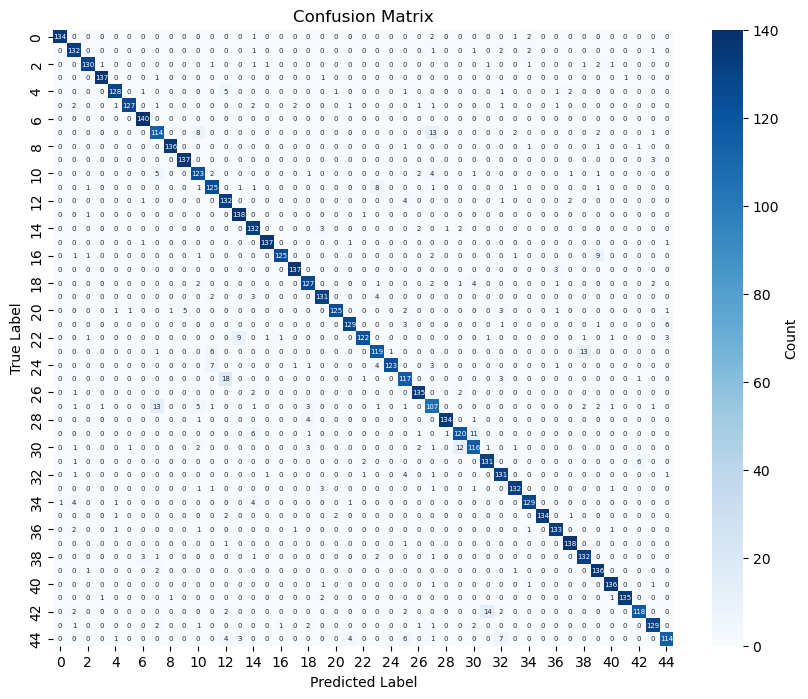

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 读取真实标签和预测结果
all_labels = []
all_preds = []
with open("./best_model_labels_preds.txt", "r") as f:
    for line in f:
        label, pred = map(int, line.strip().split())
        all_labels.append(label)
        all_preds.append(pred)

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 绘制混淆矩阵热力图
plt.figure(figsize=(10, 8))  # 调整图形大小
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'}, annot_kws={"size": 5})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# 保存图像
plt.savefig("./confusion_matrix.png", dpi=500)  # 保存为高分辨率图片
plt.show()
